In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rudaf\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
listing_df1 = pd.read_csv('./Data/listings.csv')
listing_df=listing_df1.dropna(subset=['price','room_type','number_of_reviews_ltm','availability_365'])
print(len(listing_df),len(listing_df1))
listing_df.columns

13068 13274


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

         room_type  count  mean_price
0  Entire home/apt  12120  111.452228
1     Private room    823  363.913043
2       Hotel room     69   91.902795
3      Shared room     56   25.571429


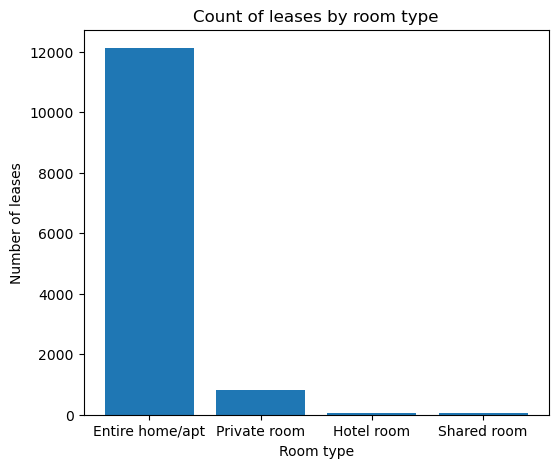

In [20]:
# Análisis por tipo de habitación
room_types=listing_df['room_type'].unique()
group_by_room_type=listing_df.groupby('room_type')
mean_price_by_room_type=group_by_room_type['price'].mean().values
count_by_room_type=listing_df['room_type'].value_counts().values
room_type_price_report=pd.DataFrame({'room_type':room_types,'count':count_by_room_type,'mean_price':mean_price_by_room_type})

print(room_type_price_report)

plt.figure(figsize=(6,5))
plt.bar(height=room_type_price_report['count'],x=room_type_price_report['room_type'])
plt.title('Count of leases by room type')
plt.ylabel('Number of leases')
plt.xlabel('Room type')
#plt.savefig('./Diagrams/Univariate/Count of leases by room type.png')
plt.show()

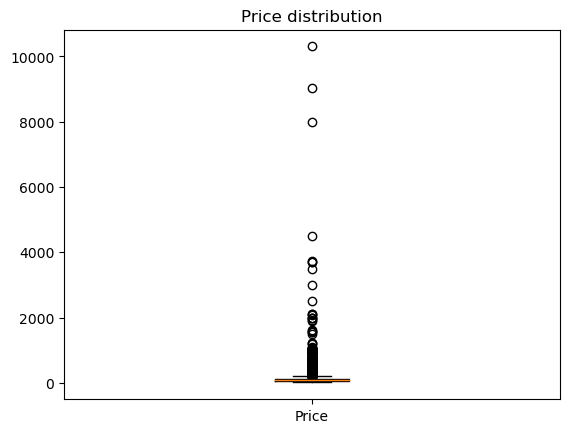

In [21]:
# Distribución de precios
prices_dist=listing_df['price']
plt.figure()
plt.boxplot(prices_dist,labels=['Price'])
plt.title('Price distribution')
#plt.savefig('./Diagrams/Univariate/Price distribution.png')
plt.show()

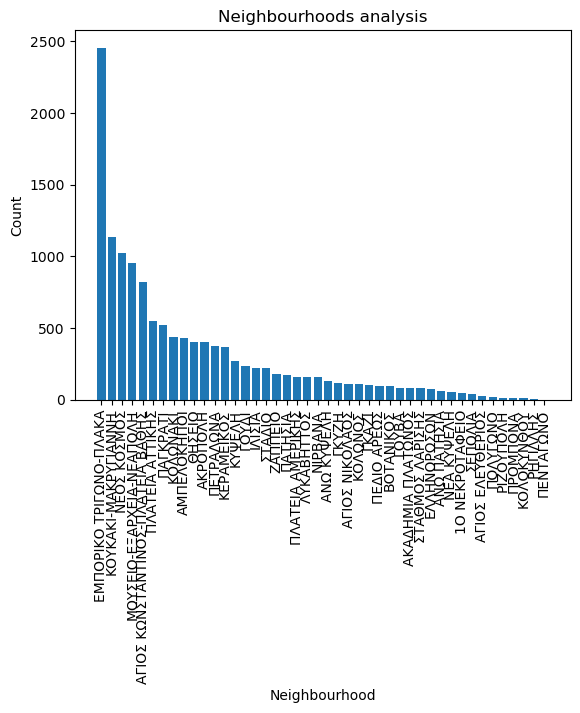

13068 0.48943985307621674


In [27]:
# Análisis de lugares por vecindario
neighbourhoods_analysis=listing_df['neighbourhood'].value_counts()
plt.bar(height=neighbourhoods_analysis.values,x=neighbourhoods_analysis.index)
plt.title('Neighbourhoods analysis')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
#plt.savefig('./Diagrams/Univariate/Neighbourhoods analysis.png')
plt.show()
print(neighbourhoods_analysis.sum(),(neighbourhoods_analysis/neighbourhoods_analysis.sum()).head(5).sum())